In [ ]:
import pandas as pd
csv_file_path = r"C:\Users\PC\Desktop\Projects\challenge-collecting-data\output_new.csv"

df = pd.read_csv(csv_file_path)
df['Price'].fillna(0, inplace=True)
df['Price'] = df['Price'].astype(int)

df['Cadastral Income'].fillna(0, inplace=True)
df['Cadastral Income'] = df['Cadastral Income'].astype(int)
df

In [71]:
import pandas as pd

num_rows, num_cols = df.shape

print(f'Number of Rows:{num_rows}')
print(f'Number of Columns:{num_cols}')

Number of Rows:14721
Number of Columns:28


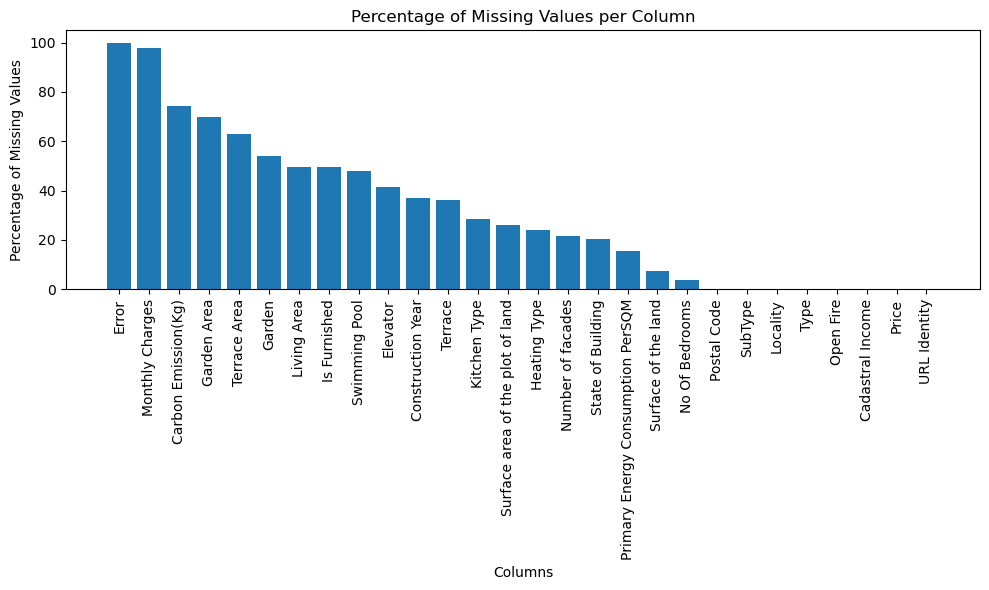

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_percentage = missing_percentage.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(missing_percentage.index, missing_percentage)
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing Values per Column')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


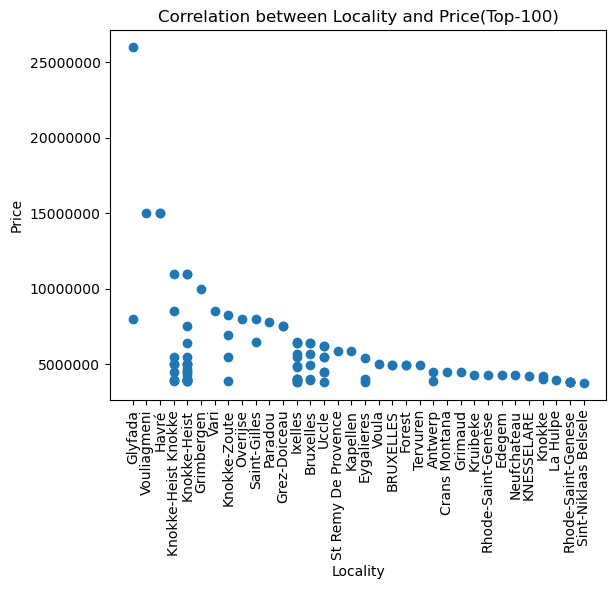

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

sorted_df = df.sort_values('Price', ascending=False)  
top_100 = sorted_df.head(100) 

locality_price = top_100[['Locality', 'Price']]

plt.scatter(locality_price['Locality'], locality_price['Price'])
plt.xlabel('Locality')
plt.ylabel('Price')
plt.title('Correlation between Locality and Price(Top-100)')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.show()


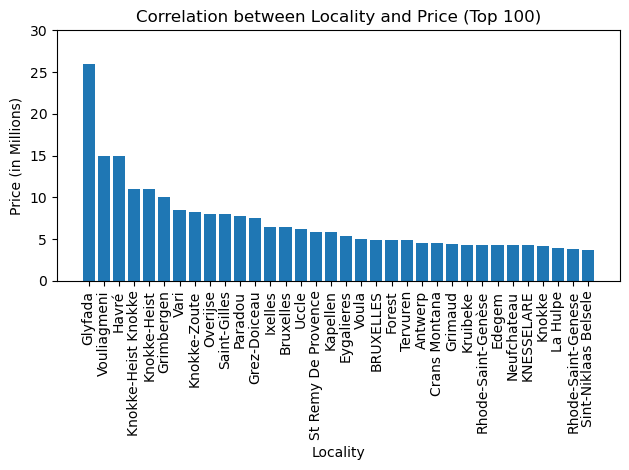

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

sorted_df = df.sort_values('Price', ascending=False) 
top_100 = sorted_df.head(100)  

locality_price = top_100[['Locality', 'Price']]

plt.bar(locality_price['Locality'], locality_price['Price'])
plt.xlabel('Locality')
plt.ylabel('Price (in Millions)')
plt.title('Correlation between Locality and Price (Top 100)')
plt.xticks(rotation=90) 

plt.ticklabel_format(style='plain', axis='y')
plt.yticks(plt.yticks()[0], [int(y/1000000) for y in plt.yticks()[0]])

plt.tight_layout() 
plt.show()


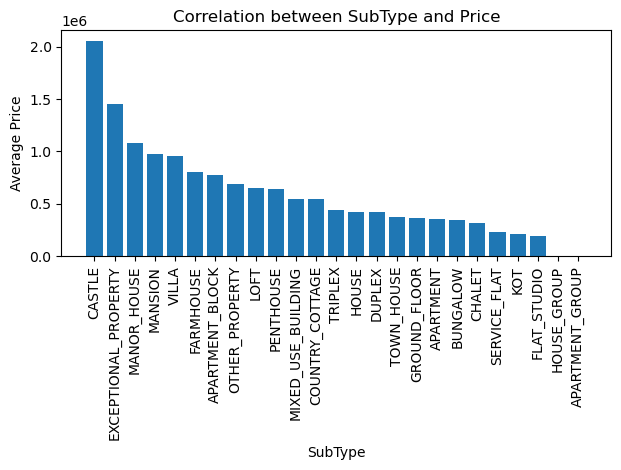

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

subtype_price = df[['SubType', 'Price']]

subtype_price = subtype_price.dropna()

avg_price = subtype_price.groupby('SubType')['Price'].mean().reset_index()

avg_price = avg_price.sort_values('Price', ascending=False)

plt.bar(avg_price['SubType'], avg_price['Price'])
plt.xlabel('SubType')
plt.ylabel('Average Price')
plt.title('Correlation between SubType and Price')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()


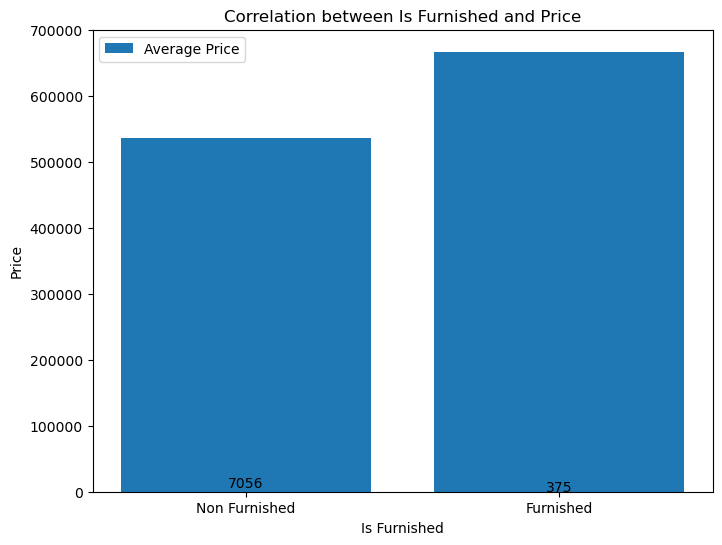

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

furnished_price = df.groupby('Is Furnished')['Price'].mean()

count_properties = df['Is Furnished'].value_counts()

plt.figure(figsize=(8, 6))
x_labels = ['Non Furnished', 'Furnished']
x_values = range(len(x_labels))

plt.bar(x_values, furnished_price, label='Average Price')
plt.xticks(x_values, x_labels)
plt.xlabel('Is Furnished')
plt.ylabel('Price')
plt.title('Correlation between Is Furnished and Price')
plt.legend()

for i, count in enumerate(count_properties):
    plt.text(i, count + 10, str(count), ha='center')

plt.show()


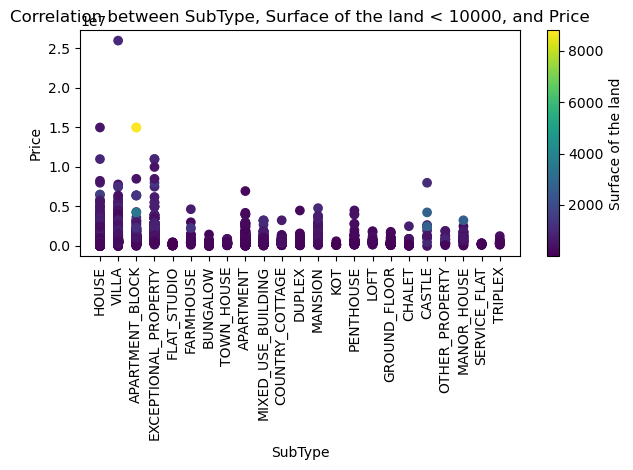

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

filtered_df = df[df['Surface of the land'] < 10000]

subtype_surface_price = filtered_df[['SubType', 'Surface of the land', 'Price']]

subtype_surface_price = subtype_surface_price.dropna()

plt.scatter(subtype_surface_price['SubType'], subtype_surface_price['Price'], c=subtype_surface_price['Surface of the land'], cmap='viridis')
plt.xlabel('SubType')
plt.ylabel('Price')
plt.title('Correlation between SubType, Surface of the land < 10000, and Price')
plt.colorbar(label='Surface of the land')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()


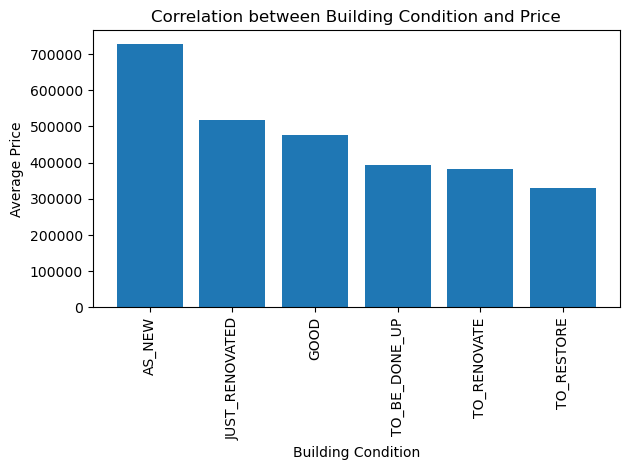

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

building_price = df[['State of Building', 'Price']]

building_price = building_price.dropna()

avg_price = building_price.groupby('State of Building')['Price'].mean().reset_index()

avg_price = avg_price.sort_values('Price', ascending=False)

plt.bar(avg_price['State of Building'], avg_price['Price'])
plt.xlabel('Building Condition')
plt.ylabel('Average Price')
plt.title('Correlation between Building Condition and Price')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()


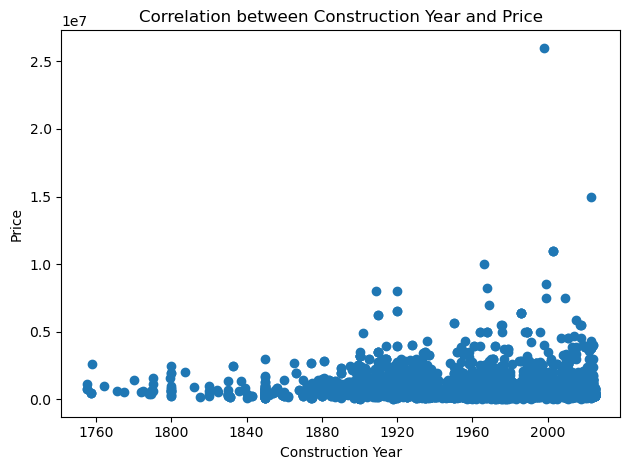

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

df['Construction Year'] = pd.to_datetime(df['Construction Year'], format='%Y', errors='coerce')

year_price = df[['Construction Year', 'Price']]

year_price = year_price.dropna()

x_min = year_price['Construction Year'].min()
x_max = year_price['Construction Year'].max()

plt.scatter(year_price['Construction Year'], year_price['Price'])
plt.xlabel('Construction Year')
plt.ylabel('Price')
plt.title('Correlation between Construction Year and Price')
plt.tight_layout()
plt.show()


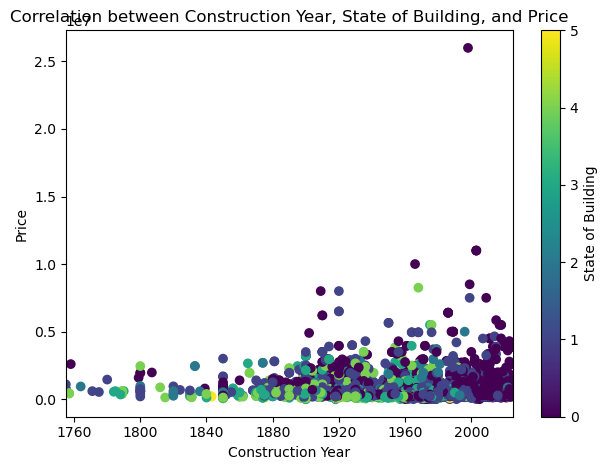

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

df['Construction Year'] = pd.to_datetime(df['Construction Year'], format='%Y', errors='coerce')

building_price_year = df[['Construction Year', 'State of Building', 'Price']]

building_price_year = building_price_year.dropna()

x_min = building_price_year['Construction Year'].min()
x_max = building_price_year['Construction Year'].max()

plt.scatter(building_price_year['Construction Year'], building_price_year['Price'], c=building_price_year['State of Building'].astype('category').cat.codes, cmap='viridis')
plt.xlabel('Construction Year')
plt.ylabel('Price')
plt.title('Correlation between Construction Year, State of Building, and Price')
plt.xlim(x_min, x_max)  # Set the x-axis limits
plt.colorbar(label='State of Building')
plt.tight_layout()
plt.show()


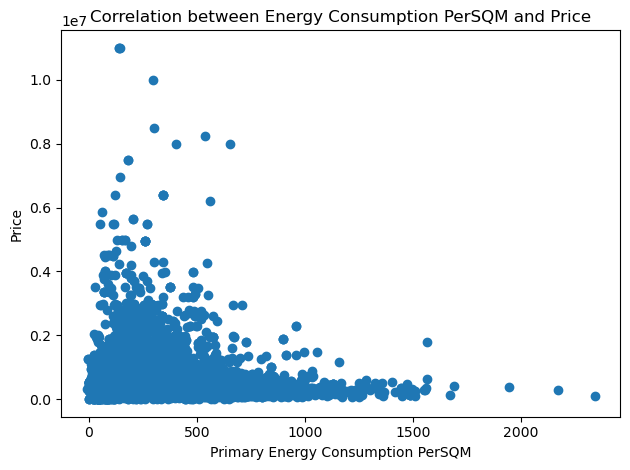

The lower Energy Consumption - higher the price


In [80]:
import pandas as pd
import matplotlib.pyplot as plt

filtered_df = df[df['Primary Energy Consumption PerSQM'] < 5000]
energy_price = filtered_df[['Primary Energy Consumption PerSQM', 'Price']]

energy_price = energy_price.dropna()

plt.scatter(energy_price['Primary Energy Consumption PerSQM'], energy_price['Price'])
plt.xlabel('Primary Energy Consumption PerSQM')
plt.ylabel('Price')
plt.title('Correlation between Energy Consumption PerSQM and Price')
plt.tight_layout()
plt.show()
print('The lower Energy Consumption - higher the price')

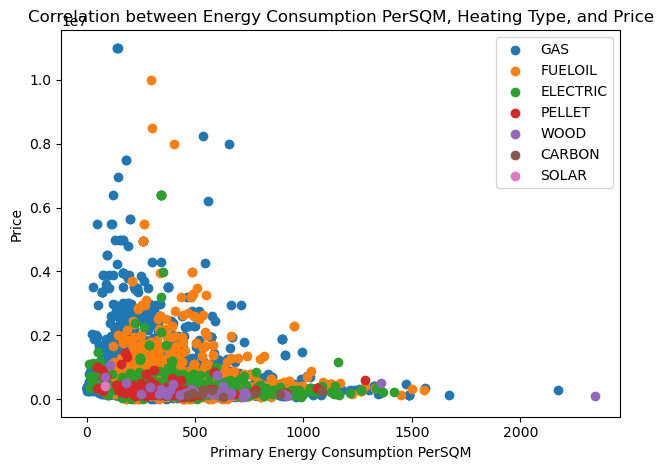

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

filtered_df = df[df['Primary Energy Consumption PerSQM'] < 5000]

energy_price_heating = filtered_df[['Primary Energy Consumption PerSQM', 'Heating Type', 'Price']]

energy_price_heating = energy_price_heating.dropna()

heating_types = energy_price_heating['Heating Type'].unique()
for heating_type in heating_types:
    subset = energy_price_heating[energy_price_heating['Heating Type'] == heating_type]
    plt.scatter(subset['Primary Energy Consumption PerSQM'], subset['Price'], label=heating_type)

plt.xlabel('Primary Energy Consumption PerSQM')
plt.ylabel('Price')
plt.title('Correlation between Energy Consumption PerSQM, Heating Type, and Price')
plt.legend()
plt.tight_layout()
plt.show()


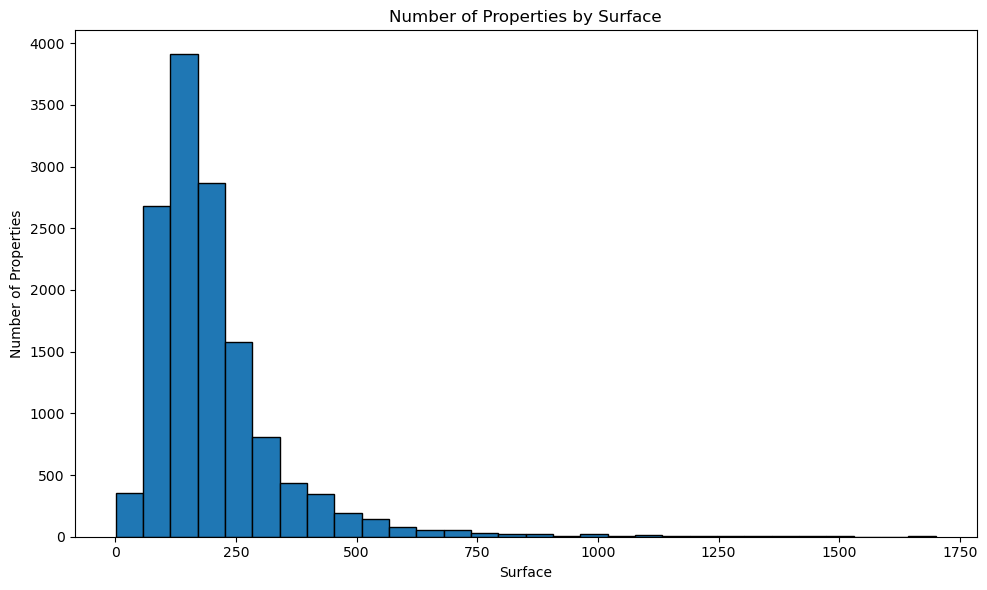

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

filtered_df = df[df['Surface of the land'] < 2000]

df_cleaned = filtered_df[~(filtered_df['Surface of the land'].isna() | (filtered_df['Surface of the land'] == float('inf')))]

df_cleaned['Surface of the land'] = df_cleaned['Surface of the land'].astype(int)

plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['Surface of the land'], bins=30, edgecolor='black')
plt.xlabel('Surface')
plt.ylabel('Number of Properties')
plt.title('Number of Properties by Surface')
plt.tight_layout()
plt.show()
